In [1]:
#Data import
import pandas as pd

evermindPath = "s3a://alpha-health-pro/amber/evermind/events/2020/*/*/*"
evermindDF = spark.read.json(evermindPath)
evermind_df = evermindDF.toPandas()

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = evermind_df.copy()

In [4]:
df[df['event']=='media_finish']['data'].iloc[6]

Row(action=None, activity-id='dac20d68-d488-4c94-a733-e10aae3f78f5', activity-title='Expansion', answer-id=None, answer-ids=None, answer-values=None, answers=None, aswer-value=None, audio-id='01a77ceb-760a-431c-b046-5290e3ba0161', date=None, duration='0:30:00.022000', example=None, feedback=None, gameVersion=None, group=None, hasBeenRescheduled=None, input-id=None, isCompleted=None, labels=None, labels-selected=None, level=None, lives=None, module-id=None, module-title=None, notification=None, numOfDaysAgo=None, page=None, position='0:04:08.451000', programme-id=None, programme-state=None, programme-step=None, programme-title=None, question=None, questionsAnswered=None, records-done=None, score=None, scroll-progress=None, sequence=None, sequenceSpeed=None, slide=None, step=None, suggested=None, targetSequence=None, tile=None, totalLevels=None, totalLives=None, totalSequences=None, totalTiles=None, userSequence=None, video-id=None, view=None, weeklyNotificationGroup=None)

In [5]:
df["event"].unique()

array(['tap', 'screen_view', 'app_pause', 'impression', 'app_open',
       'assessment', 'app_resume', 'select_date', None, 'media_pause',
       'media_exit', 'media_finish', 'media_play', 'media_restart',
       'activity_results', 'reject_telemetry',
       'app_resume_from_notification', 'app_open_from_notification',
       'accept_telemetry'], dtype=object)

In [53]:
import re
def getKey(k, raw):
    """
    Function used to return the content for different keys in the data array. 
    This function will be used to create new columns for scores etc.
    """
    if isinstance(raw, float):
        return(float('NaN'))
    
    raw = str(raw).replace('null', 'NaN')
    
    if k == 'score':
        num = re.search('{}=(\d+)'.format(k), raw)
        if num:
            num = int(num.group(1))
            return(num)

    if k == 'answers': 
        ary = re.search(r"\[(.*)\]".format(k), raw)
        print(ary)
        if ary:
            ary = ary.group()
            ary = re.sub('\D', ' ', ary)
            ary = ary.split()
            return(ary)
    
    # if string
    sub_string = re.search('{}=(.+?),'.format(k), raw)
    if sub_string:
        string = sub_string.group(1)
        string = string.replace("'", "")
        return(string)


## Getting the values out of the data dictionary

In [54]:
df2 = df.copy()
df2.fillna(value = pd.np.nan, inplace=True)

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [55]:
general = df2['data']
media = df[df['event']=='media_finish']['data']

df2['score'] = general.apply(lambda x: getKey('score', x))
df2['answers'] = general.apply(lambda x: getKey('answers', x))
df2['page'] = general.apply(lambda x: getKey('page', x))
df2['activity-title'] = general.apply(lambda x: getKey('activity-title', x))
df2['media_finish'] = media.apply(lambda x: getKey('position', x))
df2['labels'] = general.apply(lambda x: getKey('labels', x))
df2.head()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(759, 875), match='[1, 10, 7, 15], tile=None, totalLevels=4, totalLi>
<_sre.SRE_Match object; span=(759, 872), match='[1, 10, 7, 15], tile=1, totalLevels=4, totalLives>
<_sre.SRE_Match object; span=(759, 873), match='[1, 10, 7, 15], tile=10, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 872), match='[1, 10, 7, 15], tile=7, totalLevels=4, totalLives>
<_sre.SRE_Match object; span=(759, 873), match='[1, 10, 7, 15], tile=15, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 875), match='[1, 10, 7, 15], tile=None, totalLevels=4, totalLi>
<_sre.SRE_Match object; span=(759, 870), match='[11, 0, 8, 3], tile=None, totalLevels=4, totalLiv>
<_sre.SRE_Match object; span=(759, 868), match='[11, 0, 8, 3], tile=11, totalLevels=4, totalLives>
<_sre.SRE_Match object; span=(759, 867), match='[11, 0, 8, 3], tile=0, totalLevels=4, totalLives=>
<_sre.SRE_Match object; 

<_sre.SRE_Match object; span=(760, 862), match='[2, 0, 1], tile=1, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 865), match='[2, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=3, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=1, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, totalLives=3>
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 3, 3, 2, 2, 3, 3, 1, 3, 3]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 3, 3, 2, 2, 3, 3, 1, 3, 3]'>
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, total

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 2, 1, 1, 3, 2, 3, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 0, 0, 0, 0, 4, 0, 0]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 0, 0, 0, 0, 4, 0, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 3, 3, 1, 4, 3, 0, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 856), match='[2, 3], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(76

<_sre.SRE_Match object; span=(759, 885), match='[18, 13, 11, 0, 24], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 885), match='[18, 12, 20, 10, 6], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 883), match='[18, 12, 20, 10, 6], tile=18, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 883), match='[18, 12, 20, 10, 6], tile=12, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 883), match='[18, 12, 20, 10, 6], tile=20, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 883), match='[18, 12, 20, 10, 6], tile=10, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 882), match='[18, 12, 20, 10, 6], tile=6, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 885), match='[18, 12, 20, 10, 6], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 877), match='[7, 12, 11, 24, 15], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 874), match='[7, 12, 11, 24, 15], tile=7, totalLevels=4, total>
<_sre.SRE_

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 1, 3, 1, 1, 1, 3, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 1, 1, 2, 1, 0, 2, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 0, 1, 1, 1, 1, 2, 1, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

<_sre.SRE_Match object; span=(759, 873), match='[10, 14, 6, 13, 9], tile=6, totalLevels=4, totalL>
None
None
None
None
None
<_sre.SRE_Match object; span=(759, 880), match='[10, 14, 6, 13, 9], tile=9, totalLevels=4, totalL>
<_sre.SRE_Match object; span=(759, 883), match='[10, 14, 6, 13, 9], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 883), match='[10, 14, 6, 13, 9], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 883), match='[10, 14, 6, 13, 9], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 867), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(759, 883), match='[3, 13, 15, 22, 2], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 880), match='[3, 13, 15, 22, 2], tile=3, totalLevels=4, totalL>
<_sre.SRE_Match object; span=(759, 881), match='[3, 13, 15, 22, 2], tile=13, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 881), match='[3, 13, 15, 22, 2], tile=15, totalLe

<_sre.SRE_Match object; span=(759, 867), match='[0, 8, 2, 4], tile=2, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[0, 8, 2, 4], tile=4, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 870), match='[0, 8, 2, 4], tile=None, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 870), match='[0, 8, 2, 4], tile=None, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 870), match='[0, 8, 2, 4], tile=None, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
None
<_sre.SRE_Match object; span=(759, 872), match='[4, 0, 13, 11], tile=4, totalLevels=4, totalLives>
<_sre.SRE_Match object; span=(759, 872), match='[4, 0, 13, 11], tile=0, totalLevels=4, totalLives>
<_sre.SRE_Match object; span=(759, 873), match='[4, 0, 13, 11], tile=13, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 873), match='[4, 0, 13, 11], tile=11, totalLevels=4, totalLive>
<_sre

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 2, 2, 2, 2, 3, 2, 2, 2]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 2, 2, 2, 2, 3, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 0, 4, 4, 0, 2, 1, 1, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 0, 1, 1, 0, 2, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

<_sre.SRE_Match object; span=(760, 862), match='[5, 7, 0], tile=5, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[5, 7, 0], tile=7, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[5, 7, 0], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 865), match='[5, 7, 0], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 864), match='[0, 2, 4], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 861), match='[0, 2, 4], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 861), match='[0, 2, 4], tile=2, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 861), match='[0, 2, 4], tile=4, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 864), match='[0, 2, 4], tile=None, totalLevels=4, totalLives=3>
None
None
None
<_sre.SRE_Match object; span=(759, 864), match='[3, 6, 2], tile=None, totalLevels=4, totalLive

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 3, 2, 2, 1, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 1, 1, 2, 1, 2, 3, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[0, 0, 1, 0, 1, 2, 1, 0, 1, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[0, 0, 0, 4, 4, 0, 4, 4, 0, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(759, 861), match='[6, 0, 1], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 861), match='[6, 0, 1], tile=1, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 864), match='[6, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 864), match='[7, 6, 3], tile=None, totalLevels=4, totalLives=3>
<_

<_sre.SRE_Match object; span=(759, 885), match='[20, 12, 15, 0, 24], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 873), match='[14, 5, 16, 12, 6], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 871), match='[14, 5, 16, 12, 6], tile=14, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 871), match='[14, 5, 16, 12, 6], tile=16, totalLevels=4, total>
None
None
None
None
<_sre.SRE_Match object; span=(759, 883), match='[14, 5, 16, 12, 6], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 881), match='[14, 5, 16, 12, 6], tile=14, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 880), match='[14, 5, 16, 12, 6], tile=5, totalLevels=4, totalL>
<_sre.SRE_Match object; span=(759, 881), match='[14, 5, 16, 12, 6], tile=16, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 881), match='[14, 5, 16, 12, 6], tile=12, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 880), match='[14, 5, 16, 12, 6], tile=6, totalLevels=4

None
None
<_sre.SRE_Match object; span=(759, 870), match='[3, 4, 5, 8], tile=None, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 867), match='[3, 4, 5, 8], tile=3, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[3, 4, 5, 8], tile=4, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[3, 4, 5, 8], tile=5, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[3, 4, 5, 8], tile=8, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 870), match='[3, 4, 5, 8], tile=None, totalLevels=4, totalLive>
None
None
<_sre.SRE_Match object; span=(759, 870), match='[4, 2, 5, 1], tile=None, totalLevels=4, totalLive>
<_sre.SRE_Match object; span=(759, 867), match='[4, 2, 5, 1], tile=4, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[4, 2, 5, 1], tile=2, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(759, 867), match='[4, 2, 5, 1], tile=5, totalLevels=4, tota

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 856), match='[2, 0], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 853), match='[2, 0], tile=3, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 855), match='[2, 0], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 853), match='[2, 0], tile=3, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 855), match='[2, 0], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 856), match='[2, 0], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760

<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=3, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[3, 0, 1], tile=1, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 865), match='[3, 0, 1], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 865), match='[2, 4, 5], tile=None, totalLevels=4, totalLives=3>
<_sre.SRE_Match object; span=(760, 862), match='[2, 4, 5], tile=2, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[2, 4, 5], tile=4, totalLevels=

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 859), match='[3, 1], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 856), match='[3, 1], tile=3, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 856), match='[3, 1], tile=1, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 859), match='[3, 1], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 859), match='[1, 0], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 856), match='[1, 0], tile=1, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match 

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 2, 1, 1, 1, 2, 1, 1, 2, 2]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(752, 843), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(752, 843), match='[

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 0, 0, 1, 1, 1, 2, 1]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 0, 0, 1, 1, 1, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 1, 1, 0, 1, 1, 1, 0]'>
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 1, 2, 2, 2, 2, 1, 3]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 1, 2, 2, 2, 2, 1, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 855), match='[1, 

<_sre.SRE_Match object; span=(759, 882), match='[21, 17, 23, 15, 3], tile=3, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 885), match='[21, 17, 23, 15, 3], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 868), match='[9, 10, 11, 16, 5], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 865), match='[9, 10, 11, 16, 5], tile=9, totalLevels=4, totalL>
<_sre.SRE_Match object; span=(759, 872), match='[9, 10, 11, 16, 5], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 872), match='[9, 10, 11, 16, 5], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 855), match='[1, 3], tile=None, totalLevels=4, totalLives=3, t>
None
None
None
None
<_sre.SRE_Match object; span=(760, 855), match='[1, 3], tile=None, totalLevels=4, totalLi

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 1, 2, 1, 2, 0, 1, 1, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 0, 0, 1, 2, 0, 0, 2, 3, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[4, 2, 3, 1, 2, 2, 1, 2, 4, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 3, 4, 2, 2, 3, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 2, 3, 2, 1, 2, 1, 0, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 856), match='[1, 3], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 853), match='[1, 3], tile=0, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 859), match='[1, 3], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 856), match='[1, 3], tile=1, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 856), match='[1, 3], tile=3, totalLevels=4, to

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(760, 851), match='[], tile=None, totalLevels=4, totalLives=3, total>
None
None
<_sre.SRE_Match object; span=(760, 859), match='[0, 3], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 856), match='[0, 3], tile=0, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 856), match='[0, 3], tile=3, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(760, 859), match='[0, 3], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 859), match='[0, 1], tile=None,

<_sre.SRE_Match object; span=(752, 848), match='[1, 2], tile=2, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(752, 851), match='[1, 2], tile=None, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(759, 883), match='[2, 17, 18, 14, 13], tile=14, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 883), match='[2, 17, 18, 14, 13], tile=13, totalLevels=4, tota>
<_sre.SRE_Match object; span=(759, 885), match='[2, 17, 18, 14, 13], tile=None, totalLevels=4, to>
<_sre.SRE_Match object; span=(759, 883), match='[18, 17, 22, 8, 5], tile=None, totalLevels=4, tot>
<_sre.SRE_Match object; span=(759, 881), match='[18, 17, 22, 8, 5], tile=18, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 881), match='[18, 17, 22, 8, 5], tile=17, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 881), match='[18, 17, 22, 8, 5], tile=22, totalLevels=4, total>
<_sre.SRE_Match object; span=(759, 880), match='[18, 17, 22, 8, 5], tile=8, totalLevels=4, totalL>
<_sre.SRE_

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(132, 277), match='[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], answe>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 1, 1, 2, 1, 2, 1, 2, 1]'>
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 2, 1, 1, 3, 2, 1, 2, 3, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(145, 206), match='[0, 0, 1, 1, 0], answer-values=[True, True, True,>
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(766, 857), match='[], tile=None, totalLevels=4, totalLives=3, total>
<_sre.SRE_Match object; span=(766, 857), match='[], tile=None, totalLevels=4, to

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 2, 1, 1, 1, 3, 1, 2, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

<_sre.SRE_Match object; span=(760, 862), match='[1, 0, 3], tile=0, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 862), match='[1, 0, 3], tile=3, totalLevels=4, totalLives=3, t>
<_sre.SRE_Match object; span=(760, 865), match='[1, 0, 3], tile=None, totalLevels=4, totalLives=3>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 0, 2, 3, 4, 1, 3, 3, 1, 1]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 0, 2, 3, 4, 1, 3, 3, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(145, 206), match='[0, 0, 1, 1, 0], answer-values=[True, True, True,>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 0, 2, 3, 1, 2, 2, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(147, 209), match='[1, 0, 1, 1, 1], answer-values=[True, True, True,>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[4, 2, 1, 4, 2, 2, 2, 2, 2, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(371, 392), match="['Fearing the worst']">
None
None
None
None
<_sre.SRE_Match object; span=(371, 406), match="['Always looking on the down side']">
None
None
<_sre.SRE_Match object; span=(371, 406), match="['Always looking on the down side']">
None
None
<_sre.SRE_Match object; span=(371, 406), match="['Always looking on the down side']">
None
None
<_sre.SRE_Match object; span=(371, 406), match="['Always looking on the down side']">
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(371, 383), match="['Workload']">
None
None
<_sre.SRE_Match object; span=(371, 381), match="['Health']">
None
None
<_sre.SRE_Match object; span=(371, 412), match="['Interpersonal relationships', 'Health']">
None
None
<_sre.SRE_Match object; span=(371, 435), match="['Workload', 'Work-life balance', 'Interpersonal >
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(371, 403), match="['Performance at work', 'Other']">
None
None
<_sre.SRE_Match object; span=(371, 380), match="['Other']">
None
None
<_sre.SRE_Match object; span=(371, 409), match="['Performance at work', 'Self-esteem']">
None
None
<_sre.SRE_Match object; span=(371, 381), match="['Health']">
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 0, 2, 1, 2, 3, 1, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(371, 417), match="['Financial', 'Concern about family', 'Other']">
None
None
<_sre.SRE_Match object; span=(371, 380), match="['Other']">
None
None
<_sre.SRE_Match object; span=(371, 417), match="['Financial', 'Concern about family', 'Other']">
None
None
<_sre.SRE_Match object; span=(371, 405), match="['Health', 'Concern about family']">
None
None
<_sre.SRE_Match object; span=(371, 427), match="['Concern about family', 'Other', 'Financial', 'H>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 4, 2, 0, 3, 2, 0, 2, 2, 3]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 3, 2, 2, 2, 1, 1, 2, 2]'>
None
None
None
None

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(147, 209), match='[1, 1, 1, 1, 0], answer-values=[True, False, True>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]'>
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 1, 2, 1, 2, 1, 1, 1, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 1, 2, 1, 2, 1, 1, 1, 2, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(371, 423), match="['Work life balance', 'Interpersonal relationship>
None
None
<_sre.SRE_Match object; span=(371, 414), match="['Interpersonal relationships', 'Workload']">
None
None
<_sre.SRE_Match object; span=(371, 423), match="['Work life balance', 'Interpersonal relationship>
None
None
<_sre.SRE_Match object; span=(371, 427), match="['Work life balance', 'Workload', 'Performance at>
None
None
<_sre.SRE_Match object; span=(371, 406), match="['Workload', 'Performance at work']">
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='

None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(145, 208), match='[1, 0, 0, 1, 0], answer-values=[False, True, Fals>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 1, 2, 2, 0, 1, 1, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 1, 1, 2, 1, 1, 1, 1]'>
None
<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 1, 1, 2, 1, 1, 1, 1]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[3, 3, 2, 2, 1, 3, 1, 2, 3, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 3, 3, 1, 2, 3, 3, 2, 3, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Non

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(117, 147), match='[2, 2, 2, 2, 3, 2, 2, 3, 1, 2]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<_sre.SRE_Match object; span=(761, 857), match='[3, 0], tile=3, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(761, 857), match='[3, 0], tile=0, totalLevels=4, totalLives=3, tota>
<_sre.SRE_Match object; span=(761, 860), match='[3, 0], tile=None, totalLevels=4, totalLives=3, t>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<_sre.SRE_Match object; span=(117, 147), match='[1, 0, 1, 0, 1, 0, 4, 2, 0, 0]'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None

,createdAt,data,deploymentEnv,device,element,error,event,level,message,product,...,unique_name,user,userId,view,score,answers,page,activity-title,media_finish,labels
0,2020-03-20T08:08:31.112956+01:00,NaN,prod,"(, iPhone12,5, iOS, d9bae436b55136042f7a310738...",verify_code,NaN,tap,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,tap.verify.verify_code,"(,)",,verify,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-20T08:08:32.173944+01:00,"(None, None, None, None, None, None, None, Non...",prod,(ddb54e05c5a53b316166498ff0a832544fe16e0fad048...,NaN,NaN,screen_view,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,screen_view.welcome.null,(28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01...,28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01b...,welcome,None,None,None,None,NaN,None
2,2020-03-20T08:08:36.454686+01:00,"(None, None, None, None, None, None, None, Non...",prod,(ddb54e05c5a53b316166498ff0a832544fe16e0fad048...,start_assessment,NaN,tap,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,tap.welcome.start_assessment,(28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01...,28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01b...,welcome,None,None,None,None,NaN,None
3,2020-03-20T08:08:36.455877+01:00,"(None, None, None, None, None, None, None, Non...",prod,(ddb54e05c5a53b316166498ff0a832544fe16e0fad048...,NaN,NaN,screen_view,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,screen_view.assessment.null,(28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01...,28a80fdb1793dc30b2c5d81555cf8e4f765f6aa5b9c01b...,assessment,None,None,None,None,NaN,None
4,2020-03-20T08:08:33.916720+01:00,NaN,prod,"(, iPhone11,8, iOS, e2a479f13d015870287e0eabd5...",create_account,NaN,tap,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,tap.sign_up.create_account,"(,)",,sign_up,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2 = df2.replace('null', pd.np.nan)
df2.tail()

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,createdAt,data,deploymentEnv,device,element,error,event,level,message,product,...,unique_name,user,userId,view,score,answers,page,activity-title,media_finish,labels
111132,2020-03-19T17:38:25.158890+00:00,NaN,prod,"(, iPhone10,6, iOS, 6b931f0522580a6db4f76afd8e...",NaN,NaN,app_pause,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.4.1)",...,app_pause.splash.null,"(,)",,splash,NaN,NaN,NaN,NaN,NaN,NaN
111133,2020-01-29T19:09:02.764570+01:00,NaN,prod,"(c481f6cb3a459905, Redmi Note 5, Android, None)",NaN,NaN,app_resume,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 1.0....",...,app_resume.sign-up.null,"(c481f6cb3a459905,)",c481f6cb3a459905,sign-up,NaN,NaN,NaN,NaN,NaN,NaN
111134,2020-01-29T19:15:28.427273+01:00,NaN,prod,"(c481f6cb3a459905, Redmi Note 5, Android, None)",NaN,NaN,app_resume,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 1.0....",...,app_resume.sign-up.null,"(c481f6cb3a459905,)",c481f6cb3a459905,sign-up,NaN,NaN,NaN,NaN,NaN,NaN
111135,2020-01-13T15:19:22.823359+00:00,NaN,prod,"(70a94f23afa7b234, VOG-L09, Android, None)",NaN,NaN,app_pause,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 1.0....",...,app_pause.assessment.null,"(70a94f23afa7b234,)",70a94f23afa7b234,assessment,NaN,NaN,NaN,NaN,NaN,NaN
111136,2020-02-06T10:00:41.039805+00:00,NaN,prod,"(, iPhone12,5, iOS, 71367b39-db70-4045-ab6f-09...",NaN,NaN,app_pause,NaN,NaN,"(com.wingmanalpha.app.evermind, Evermind, 2.0.0)",...,app_pause.verify.null,"(,)",,verify,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

def outputPerUser(df, cat):
    """
    Function used to return a new dataframe grouped by userids. 
    Used to accumulate different scores, activities etc. per user in a list.
    """
    df.dropna(subset = [cat], inplace=True)
    
    df.sort_values(["userId", cat])
    valid_ids = df['userId'].unique()
    new = df[(df['userId'].isin(valid_ids))]
    new = new.groupby('userId')
    new = new[cat].agg(list)
    new = new.to_frame()[cat]
    newdf = new.to_frame()   
    return newdf

In [17]:
df3 = df2.copy()
scoresdf = outputPerUser(df3, 'score')

In [18]:
scoresdf

,score
userId,
003485c5fc50ee1686c0b837634d2e1263cd483147a7f780691bcd72991c6fa2,"[16.0, 13.0]"
008c8cd109af590b33bc599e81e5212f699c870ba448de18333b57fd9c2a4e50,"[20.0, 20.0]"
014f2740692fd10525909388506f48ca43dcf34066c29ae08d10aff1b62036f8,[20.0]
02064ef9ea1ee046cf82d94530b11ac134299a641577e1676d7b633813e44e78,[20.0]
02cce9482d12301aad3409374eb7c91da3347c41a61ad552e48bdadf11fa40f7,[15.0]
...,...
fd9890bc631b19514d3e93b4a9e17e39517665ba4808a1723cd4f2fab4205217,[14.0]
fdd17fc63dd94bac507250c09af62acdb270b7a96383294b227902baa2c8194d,[12.0]
fe5897458a09cbda336abb88018ba6e4570d570fc935c5e0b036453068e74363,[21.0]


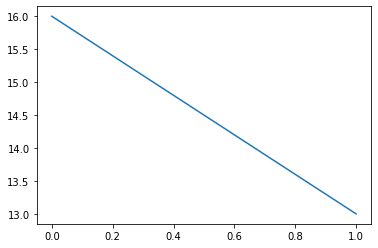

In [21]:
import matplotlib.pyplot as plt
plt.plot(scoresdf['score'][0])

## Calculate total time of listening to media

In [58]:
df3 = df2.copy()
df3['media_finish'] = pd.to_timedelta(df3.media_finish)

In [59]:
df3.dropna(subset = ["media_finish"], inplace=True)

In [60]:
timesdf = outputPerUser(df3, 'media_finish')

In [61]:
def calculateTotalDuration(x):
    total = sum(pd.to_timedelta(x), datetime.timedelta(0,0))
    return total 

In [62]:
import datetime
test = timesdf['media_finish']
timesdf['total'] = test.apply(lambda x: calculateTotalDuration(x))

In [63]:
timesdf.sort_values("total", ascending = False)

,media_finish,total
userId,,
e93f8e15156354ad625ed02ff9ba6de17c471b2b4e9646296b6c5fccd8a5d3a1,"[0 days 00:04:08.451000, 0 days 00:30:00.02200...",2 days 12:39:51.288000
5ce1ff1bc836d5a6dbefd33ae207d2b5ab090d86b4335cb9e4949c10260e274c,"[0 days 00:12:34.933000, 0 days 00:30:00.02200...",1 days 16:56:15.195000
7581ba5efa99ae5218b84d431ed70fd24a8b54cf01b87b9b986356ec0214c425,"[0 days 00:29:59.989000, 0 days 00:30:00.02200...",0 days 20:40:02.966000
7ab79d4a4587b807d8be5b72ac25cddab01bae05fdd65f6f51c159113fe1b2d6,"[0 days 00:10:28.492000, 0 days 00:30:00.02200...",0 days 09:04:54.951000
bb00194db58e851b5e52c67bc5b130ca8780bb52e925378238d5f7c81840f624,"[0 days 00:10:11, 0 days 00:10:11, 0 days 00:1...",0 days 07:06:31
...,...,...
cd55f5aff3cac0d1f4cabbbd6042396c7c495d0990aef1609fe30141819af70c,[0 days 00:02:02.376000],0 days 00:02:02.376000
d19d1361073fca7a3eddc1bc6a1d36ce18120139de9b2c8e41389b02edc8b1c7,[0 days 00:02:02.376000],0 days 00:02:02.376000
06a4491df6faa95c85bb6591353afc8a3bbb4c8a8e44515f5bda1133f9a5b741,[0 days 00:02:02.376000],0 days 00:02:02.376000


## Popular tracks and duration per user

In [64]:
df3 = df2.copy()
df3['media_finish'] = pd.to_timedelta(df3.media_finish)

In [66]:
df3.dropna(subset = ['media_finish'], inplace=True)
df3.sort_values(["userId", 'media_finish'])
valid_ids = df3['userId'].unique()
pop = df3[(df3['userId'].isin(valid_ids))]
pop = pop.groupby(['userId', 'activity-title'])
pop = pop['media_finish'].agg(list)
pop = pop.to_frame()['media_finish']
popdf = pop.to_frame()  

In [68]:
import datetime
test = popdf['media_finish']
popdf['total'] = test.apply(lambda x: calculateTotalDuration(x))

In [69]:
popdf.sort_values("total", ascending = False)

,,media_finish,total
userId,activity-title,,
e93f8e15156354ad625ed02ff9ba6de17c471b2b4e9646296b6c5fccd8a5d3a1,Expansion,"[0 days 00:04:08.451000, 0 days 00:30:00.02200...",2 days 12:20:44.895000
5ce1ff1bc836d5a6dbefd33ae207d2b5ab090d86b4335cb9e4949c10260e274c,Autogenic training for sleep,"[0 days 00:12:34.933000, 0 days 00:30:00.02200...",0 days 20:57:08.012000
7581ba5efa99ae5218b84d431ed70fd24a8b54cf01b87b9b986356ec0214c425,Autogenic training for sleep,"[0 days 00:29:59.989000, 0 days 00:14:45.06100...",0 days 06:14:15.359000
997bb356b4ca556f554915f8389478ac18a3579d120a85784de4531fb524d637,Midnight in the dunes,"[0 days 00:30:00, 0 days 00:30:00, 0 days 00:3...",0 days 06:00:00
7ab79d4a4587b807d8be5b72ac25cddab01bae05fdd65f6f51c159113fe1b2d6,Campfire,"[0 days 00:10:28.492000, 0 days 00:30:00.02200...",0 days 04:20:56.608000
...,...,...,...
c57fa39b99e316281235d0eb4c2bca1100939cd833b96259945cefff39ec2e64,None,[0 days 00:02:02.376000],0 days 00:02:02.376000
cd55f5aff3cac0d1f4cabbbd6042396c7c495d0990aef1609fe30141819af70c,None,[0 days 00:02:02.376000],0 days 00:02:02.376000
d19d1361073fca7a3eddc1bc6a1d36ce18120139de9b2c8e41389b02edc8b1c7,None,[0 days 00:02:02.376000],0 days 00:02:02.376000


## Labels per user

In [70]:
labels = df2.copy()
labels['labels'].unique()

array([nan, 'None', '[Work-life balance', '[Performance at work]',
       '[Workload', '[Work-life balance]', '[Performance at work',
       '[Health', '[Other]', '[Health and wellbeing]', '[Friendships]',
       '[My family]', '[Myself]', '[The world we live in]',
       '[Life at work]', '[Myself', '[Friendships', '[My family',
       '[Interpersonal relationships', '[Interpersonal relationships]',
       '[Concern about family]', '[Generalisation]', '[Life at work',
       '[Fearing the worst', '[Fearing the worst]', '[Mind reading',
       '[Mind reading]', '[Always looking on the down side]',
       '[Self-esteem', '[Concern about family', '[Workload]',
       '[Financial]', '[Black and white thinking]',
       '[The world we live in', '[Financial', '[Health]',
       '[Always looking on the down side', '[Black and white thinking',
       '[Having the resources to live my life how I want to]',
       '[Work life balance'], dtype=object)

In [71]:
labels = outputPerUser(labels, 'labels')

In [72]:
labels.sort_values("labels").iloc[3][0]

['None']

## Popular weekdays per user

In [74]:
time = df2.copy()
time['createdAt']=pd.to_datetime(time['createdAt'], utc=True)

In [75]:
time['createdAt'].iloc[1].weekday()

4

In [76]:
def weekdays(x):
    w = x.weekday()  
    return w

In [77]:
test = time[time['event'] == 'app_open']['createdAt']

In [78]:
time['weekday'] = test.apply(lambda x: weekdays(x))

In [79]:
x = outputPerUser(time, 'weekday')
x

,weekday
userId,
,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
05A7E3CF-613E-4272-8DAC-FA7B8FA2677E,"[4.0, 4.0]"
0E4AE1B1-CA92-484B-969A-3010A04EBB05,[2.0]
0E596382-CBC5-4336-8A54-B10C04483D30,"[2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0]"
0b6b5fefd884b9c375285d988872f2845c00af839ff99986ca372af5274a9611,"[5.0, 5.0]"
10568754-EDC4-482B-BADB-8D04F3AF1D66,[1.0]
1ACC78BD-B3AA-468F-ADA5-93D0D2F49023,"[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0]"
1C3127FC-DFE6-4E44-9D5D-823E234078ED,[6.0]
1CED046F-257E-46FD-92FA-B46095BF33A6,[3.0]


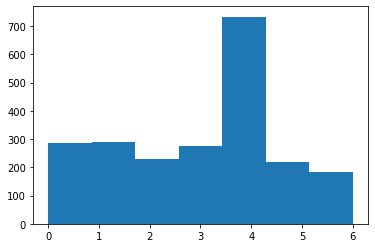

In [80]:
plt.hist(x['weekday'][0], bins = 7)
plt.show()

In [ ]:
df2